In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tabla Productos por cada Planta

Esta tabla enumera todas las combinaciones de productos y almacén admitidas.

In [8]:
products = pd.read_excel("data.xlsx", sheet_name = "ProductsPerPlant")

products.columns = ["Planta", "Producto"]
products = products.replace({"[^\d.]": ""}, regex = True).astype(int)

In [9]:
products = products[products["Planta"] <= 15]

*¿La tabla contiene filas duplicadas? Si tiene filas duplicadas, deben ser eliminadas.*

In [14]:
if __name__ == "__main__":
    if products.duplicated().any():
        print("La tabla tiene filas duplicadas.")
        products.drop_duplicates(inplace = True)
    else:
        print("La tabla no tiene filas duplicadas.")


La tabla no tiene filas duplicadas.


*¿La tabla tiene valores nulos? Si tiene valones nulos, las filas que los contienen deben ser eliminadas.*

In [11]:
if __name__ == "__main__":
    if products.isna().any(axis = None):
        print("La tabla tiene valores nulos.")
        products.dropna(axis = 1, inplace = True)
    else:
        print("La tabla no tiene valores nulos.")

La tabla no tiene valores nulos.


In [12]:
g1 = products.groupby(by = "Planta").agg({"Producto": np.size}).rename(columns = {"Producto": "Recuento de Productos"})
g1

,Recuento de Productos
Planta,
1,220
2,116
3,781
4,134
5,127
6,26
7,29
8,21
9,9


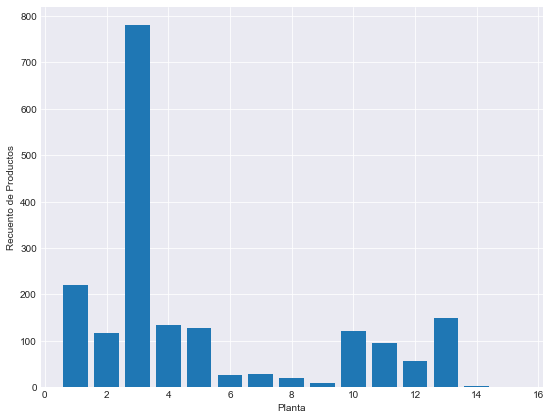

In [13]:
if __name__ == "__main__":
    plt.style.use("seaborn-darkgrid")
    plt.figure(figsize = (9, 7))
    plt.bar(g1.index, g1["Recuento de Productos"])
    plt.xlabel("Planta")
    plt.ylabel("Recuento de Productos")